<script src="https://polyfill.io/v3/polyfill.min.js?features=es6"></script> 
<script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3.0.1/es5/tex-mml-chtml.js"></script>

# Figure S13
One reviewer made the following major point in the review of our paper: 

> The scientific question of comparing Bb-PG from live vs dead Bb is of great interest. While the authors cite data from Li et al. 2011 (discussed in lines 448-451) which demonstrates that Bb cannot be cultured in the presence of Lyme arthritis joint fluid, this manuscript exclusively analyzes Bb-PG produced by live Bb. The authors do a good job qualifying this correlation by using “likely dead”; however, they might consider experiments that could provide direct evidence. Some ideas include “starving” Bb of nutrients in BSK (ie. growing Bb until cultures become yellow and cells begin to die) or PBS-inactivation of Bb, using this as the input for the pipeline described in Fig 1B.

To address this question, I cultured 2 liters of *Borrelia* cells into 10 days of stationary phase, [where Borrelia cells have been reported to have > 90% of the culture die](https://journals.asm.org/doi/full/10.1128/jb.00457-24). I then purified PG according to the protocol laid out in our [preprint](https://www.biorxiv.org/content/10.1101/2025.01.08.631998v1) and in the [GlycoPOST main repository](https://glycopost.glycosmos.org/entry/GPST000537). I got a yield of 2.5 mg/ml.

To analyze the composition of the purified sacculi, I digested them with mutanolysin. I made a reaction mixture with 0.125 mg of cell wall per 50 ul.

$\left( \frac{1~ml}{2.5~mg} \right) \left( \frac{1000~\mu l}{1~ml} \right) \left( 0.125~mg \right) = 50~\mu l$

| Component | Sample | control|
|-----------|--------|--------|
|LC-MS grade H2O | 92 ul | 192 ul|
|1M Tris-HCl, pH 7 | 4 ul | 4 ul |
| B31 IR sacculus (2.5 mg/ml) | 100 ul | - |
| 1 mg/ml mutanolysin (4000 U/ml) | 4 ul | 4 ul |
Total | 200 ul | 200 ul|


I incubated the mixtures overnight, shaking at 37 C, 700 RPM. 
- Upon returning in the morning, I boiled the samples for 5 min at 100 C, shaking 700 RPM. 
- Centrifuged at max RPM for 15 min, 4 C to pellet denatured proteins.
- Transferred the samples to separate 1.5 ml Eppendorf tubes.
- In case there is too much sample for the LC-MS, I diluted the + PG sample 1/10 (15 ul supernatant : 135 ul LC-MS grade water).
- Aliquoted 60 ul of sample into LC-MS vials and ran them on QTOF LC-MS.

Here, I present the analysis to see the muropeptide composition of "dead" *Borrelia burgdorferi* strain B31 IR. 

Code by Joshua W. McCausland in the Christine Jacobs-Wagner lab, 2025.

In [2]:
import numpy as np
import pandas as pd
from pymzml.run import Reader
from matplotlib import pyplot as plt,ticker,lines
plt.rcParams["font.family"] = "Arial" #Set global font to arial
import seaborn as sns
import glob,os,re
import warnings
from skimage import io
warnings.filterwarnings("ignore")

def refine_mass(df,ppm = 20,mass_to_search = 0):
    low_mass = mass_to_search - (ppm*mass_to_search/1e6)
    high_mass = mass_to_search + (ppm*mass_to_search/1e6)
    result = df.apply(lambda row: np.sum(row.peaks[np.where(np.logical_and(row.mz >= low_mass, row.mz <= high_mass))]) if row.peaks[np.where(np.logical_and(row.mz > low_mass, row.mz < high_mass))].shape[0] > 0 else 0,axis=1)
    return result

experiment_directory = '/Volumes/Data_05/Shares/Data_05/Josh_McCausland/Projects/Bb_PG_Shedding/LCMS/20250312-dead_cell_PG'

This is the code to convert mzML files to Pandas dataframes. 
- Add the experiment directory where mzML files are located. 
- It will iterate through each mzML file, convert them to a dataframe, then save as a pickle in the local directory.
- It will save files in a folder named "pickle_data." **Make this folder before you run this code.**

In [ ]:
FileList = glob.glob(f'{experiment_directory}/mzML/*.mzML')
for file in FileList:
    filename = os.path.basename(file).removesuffix('.mzML')
    filename = filename[3:]
    run = Reader(file)
    run_df = pd.DataFrame({'scanID': [key for key in run.info['offset_dict'].keys() if str(key).isnumeric()]})
    run_df['time'] = run_df.scanID.apply(lambda row: run[row].scan_time_in_minutes())
    run_df['peaks'] = run_df.scanID.apply(lambda row: run[row].centroidedPeaks)
    run_df['mz'] = run_df.peaks.apply(lambda row: np.column_stack(row)[0] if row.shape[0] > 0 else row)
    run_df['peaks'] = run_df.peaks.apply(lambda row: np.column_stack(row)[1] if row.shape[0] > 0 else row)
    run_df.to_pickle(f'{experiment_directory}/pickle_data/{filename}.pkl')
run_df

,scanID,time,peaks,mz
0,69364,1.155933,"[589.7597045898438, 433.25, 4471.673828125, 23...","[70.04085126705965, 70.05335793146827, 70.0655..."
1,70043,1.167250,"[382.39263916015625, 291.7396240234375, 5034.7...","[70.04109553811469, 70.05099748108917, 70.0658..."
2,70723,1.178583,"[262.6576232910156, 516.0975952148438, 4124.78...","[70.02650133693683, 70.04933225470886, 70.0657..."
3,71402,1.189900,"[615.3712158203125, 4666.9228515625, 25125.298...","[70.04843452468572, 70.06548597705624, 71.0609..."
4,72081,1.201217,"[707.9480590820312, 1707.21484375, 25552.55273...","[70.0305592450332, 70.0520715514153, 70.065448..."
...,...,...,...,...
1663,1199201,19.986550,"[662.7212524414062, 7857.1279296875, 212.70370...","[70.04809178262738, 70.06519035392603, 71.0349..."
1664,1199880,19.997867,"[803.909912109375, 7830.486328125, 22073.5, 89...","[70.04879032781938, 70.0651422911283, 71.06089..."
1665,1200560,20.009200,"[725.2406616210938, 6606.68359375, 569.7576904...","[70.05024010247485, 70.065495723026, 71.048993..."
1666,1201239,20.020517,"[214.9619598388672, 734.2073364257812, 8893.07...","[70.02822321203935, 70.05173930973388, 70.0656..."


This is a general check with a total ion chromatogram, +/- PG to the mutanolysin digestion. I can see that we can detect a difference between the two.

Text(0, 0.5, 'Total ion counts (x10$^7$)')

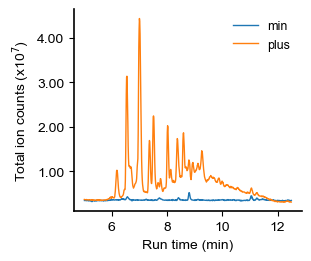

In [3]:
def y_fmt(x, y):
    return f'{(x/1e7):<2.2f}'.format(x).split('e')[0]

time_window = [5,12.5]
filelist = glob.glob(f'{experiment_directory}/pickle_data/min_undil*.pkl') + glob.glob(f'{experiment_directory}/pickle_data/plus_undil*')
merged_df = pd.DataFrame()
for file in filelist:
    tempdf = pd.read_pickle(file)
    filename = os.path.basename(file).removesuffix('.pkl')
    tempdf['filename'] = np.repeat(filename,tempdf.shape[0])
    merged_df = pd.concat([merged_df,tempdf])
merged_df['condition'] = merged_df.filename.apply(lambda x: x.split('_')[0])
merged_df['tic'] = merged_df.peaks.apply(np.sum)

fig,_ax = plt.subplots(figsize=[3,2.5],layout='constrained')
sns.lineplot(merged_df[merged_df.time.between(time_window[0],time_window[1])],x='time',y='tic',hue='condition',linewidth=1,ax=_ax)
_ax.legend(loc='upper right',frameon = False,fontsize=9,ncols=1)
_ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
_ax.spines[['right','top']].set_visible(False)
_ax.spines[['left','bottom']].set_linewidth(1.2)
_ax.set_xlabel('Run time (min)')
_ax.set_ylabel('Total ion counts (x10$^7$)')

This is a general scan of major muropeptide, sugar-only, and peptide-only products. I see muropeptides, indicative of the mutanolysin digestion. 

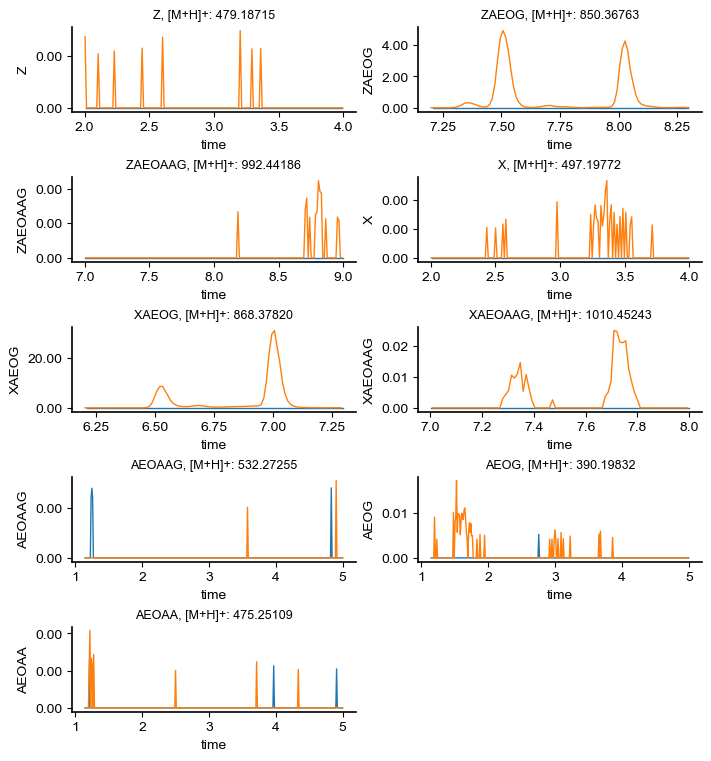

In [20]:
pg_species = {
    'Z': [2,4],
    'ZAEOG': [7.2,8.3],
    'ZAEOAAG': [7,9],
    'X': [2,4],
    'XAEOG': [6.2,7.3],
    'XAEOAAG': [7,8],
    'AEOAAG': [1,5],
    'AEOG': [1,5],
    'AEOAA': [1,5]
}

reference_df = pd.read_pickle('included_small_datasets/muropeptide_reference_df.pkl').drop_duplicates()
reference_df = reference_df[reference_df.Species.isin(pg_species.keys())]

filelist = glob.glob(f'{experiment_directory}/pickle_data/min_undil*.pkl') + glob.glob(f'{experiment_directory}/pickle_data/plus_dil10*')
merged_df = pd.DataFrame()
for file in filelist:
    tempdf = pd.read_pickle(file)
    filename = os.path.basename(file).removesuffix('.pkl')
    tempdf['filename'] = np.repeat(filename,tempdf.shape[0])
    merged_df = pd.concat([merged_df,tempdf])
merged_df['condition'] = merged_df.filename.apply(lambda x: x.split('_')[0])
for _,row in reference_df.iterrows():
        merged_df[row.Species] = refine_mass(merged_df,mass_to_search=row.mz_plus_1,ppm=20)

def y_fmt(x, y):
    return f'{(x/1e5):<2.2f}'.format(x).split('e')[0]

fig,axs = plt.subplots(nrows = 5,ncols = 2,figsize = (7,1.5*5),layout = 'constrained')
for _ax,_dict in zip(axs.ravel(),pg_species.items()):
    _species,time_window = _dict
    df_subset = merged_df[merged_df.time.between(time_window[0],time_window[1])].reset_index()
    sns.lineplot(data=df_subset,x='time',y=_species,hue='condition',linewidth=1,ax=_ax,legend=False)
    _ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
    _ax.set_title(f'{_species}, [M+H]+: {reference_df[reference_df.Species == _species].mz_plus_1.values[0]:.5f}',fontsize=9)
    _ax.spines[['right','top']].set_visible(False)
    _ax.spines[['left','bottom']].set_linewidth(1.2)

axs.ravel()[-1].remove()

In [5]:
pg_species = {
    'Z': [2,4],
    'ZAEOG': [7.2,8.3],
    'ZAEOAAG': [8,9],
    'X': [2,4],
    'XAEOG': [6.2,7.3],
    'XAEOAAG': [7,8],
    'AEOAAG': [1,5],
    'AEOG': [1,5],
    'AEOAA': [1,5]
}

reference_df = pd.read_pickle('included_small_datasets/muropeptide_reference_df.pkl').drop_duplicates()
reference_df = reference_df[reference_df.Species.isin(pg_species.keys())]

filelist = glob.glob(f'{experiment_directory}/pickle_data/min_undil*.pkl') + glob.glob(f'{experiment_directory}/pickle_data/plus*')
merged_df = pd.DataFrame()
for file in filelist:
    tempdf = pd.read_pickle(file)
    filename = os.path.basename(file).removesuffix('.pkl')
    tempdf['filename'] = np.repeat(filename,tempdf.shape[0])
    tempdf['strain'] = np.repeat('Bb523',tempdf.shape[0])
    merged_df = pd.concat([merged_df,tempdf])
merged_df['condition'] = merged_df.filename.apply(lambda x: x.split('_')[0])
merged_df['dilution'] = merged_df.filename.apply(lambda x: 1 if x.split('_')[1] == 'undil' else 0.1)

for _,row in reference_df.iterrows():
    merged_df[row.Species] = refine_mass(merged_df,mass_to_search=row.mz_plus_1,ppm=20)

display(merged_df.head(5))

,scanID,time,peaks,mz,filename,strain,condition,dilution,AEOAA,X,Z,AEOG,AEOAAG,XAEOG,ZAEOG,XAEOAAG,ZAEOAAG
0,68916,1.148467,"[377.2355651855469, 4896.1845703125, 25943.468...","[70.04691321329388, 70.06517310419656, 71.0609...",min_undil_1,Bb523,min,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,69595,1.159783,"[315.248291015625, 5169.4541015625, 29389.4785...","[70.04992252129284, 70.06507032500875, 71.0609...",min_undil_1,Bb523,min,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,70275,1.171117,"[611.9427490234375, 5618.50732421875, 31092.60...","[70.05151971908063, 70.06576525770556, 71.0610...",min_undil_1,Bb523,min,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,70954,1.182433,"[744.8890991210938, 4781.2109375, 26685.873046...","[70.05145186440227, 70.06507820923586, 71.0608...",min_undil_1,Bb523,min,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,71634,1.193767,"[517.0963134765625, 1837.3311767578125, 29867....","[70.02903164113746, 70.05086000063005, 70.0654...",min_undil_1,Bb523,min,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now a specific comparison between undiluted mutanolysin digestion products and 1/10 diluted digestion products. The undiluted sample saturates the detector, so I will use the 1/10 sample for the official paper.

This specifically compares Glc*N*Ac-Mur*N*Ac-L-Ala-D-Glu-L-Orn(Gly) (XAEOG) with Glc*N*Ac-AnhMur*N*Ac-L-Ala-D-Glu-L-Orn(Gly) (ZAEOG).

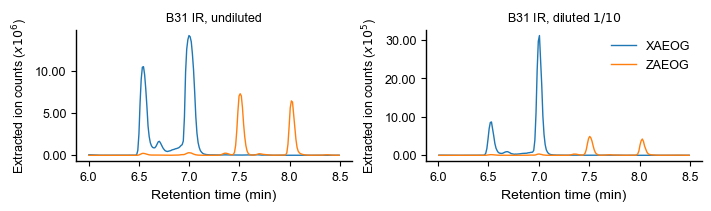

In [15]:
def y_fmt(x, y):
    return f'{(x/1e6):<2.2f}'.format(x).split('e')[0]

fig,axs = plt.subplots(nrows = 1,ncols=2,figsize=[7,2],layout='constrained')

_ax = axs[0]
to_plot = merged_df[(merged_df.condition == 'plus') & (merged_df.time.between(6,8.5)) & (merged_df.dilution == 1)]
to_plot = to_plot[['time','XAEOG','ZAEOG']].melt(id_vars=['time']).reset_index(drop=True)
sns.lineplot(data=to_plot,x='time',y='value',hue='variable',ax=axs[0],linewidth=1,ci=None,legend=False)
_ax.set_title('B31 IR, undiluted',fontsize=9)
_ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
_ax.set_ylabel('Extracted ion counts ($x10^6$)',fontsize=9)

def y_fmt(x, y):
    return f'{(x/1e5):<2.2f}'.format(x).split('e')[0]

_ax = axs[1]
to_plot = merged_df[(merged_df.condition == 'plus') & (merged_df.time.between(6,8.5)) & (merged_df.dilution == 0.1)]
to_plot = to_plot[['time','XAEOG','ZAEOG']].melt(id_vars=['time']).reset_index(drop=True)
sns.lineplot(data=to_plot,x='time',y='value',hue='variable',ax=axs[1],linewidth=1,ci=None)
_ax.set_title('B31 IR, diluted $1/10$',fontsize=9)
_ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
_ax.set_ylabel('Extracted ion counts ($x10^5$)',fontsize=9)
_ax.legend(frameon=False,fontsize=9)

for _ax in axs.ravel():
    _ax.spines[['right','top']].set_visible(False)
    _ax.spines[['left','bottom']].set_linewidth(1)
    _ax.tick_params(axis='both',labelsize=9)
    _ax.set_xlabel('')
    _ax.set_xlabel('Retention time (min)')

Now a specific comparison between undiluted mutanolysin digestion products and 1/10 diluted digestion products. The undiluted sample of XAEOG saturated the detector above, so I will use the 1/10 sample for the official paper.

This specifically compares Glc*N*Ac-Mur*N*Ac-L-Ala-D-Glu-L-Orn(Gly)-D-Ala-D-Ala (XAEOAAG) with Glc*N*Ac-AnhMur*N*Ac-L-Ala-D-Glu-L-Orn(Gly)-D-Ala-D-Ala (ZAEOAAG).

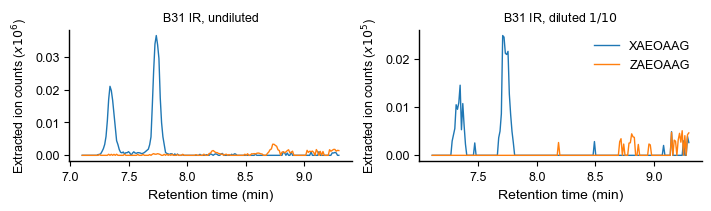

In [13]:
def y_fmt(x, y):
    return f'{(x/1e6):<2.2f}'.format(x).split('e')[0]

fig,axs = plt.subplots(nrows = 1,ncols=2,figsize=[7,2],layout='constrained')

_ax = axs[0]
to_plot = merged_df[(merged_df.condition == 'plus') & (merged_df.time.between(7.1,9.3)) & (merged_df.dilution == 1)]
to_plot = to_plot[['time','XAEOAAG','ZAEOAAG']].melt(id_vars=['time']).reset_index(drop=True)
sns.lineplot(data=to_plot,x='time',y='value',hue='variable',ax=axs[0],linewidth=1,ci=None,legend=False)
_ax.set_title('B31 IR, undiluted',fontsize=9)
_ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
_ax.set_ylabel('Extracted ion counts ($x10^6$)',fontsize=9)

def y_fmt(x, y):
    return f'{(x/1e5):<2.2f}'.format(x).split('e')[0]

_ax = axs[1]
to_plot = merged_df[(merged_df.condition == 'plus') & (merged_df.time.between(7.1,9.3)) & (merged_df.dilution == 0.1)]
to_plot = to_plot[['time','XAEOAAG','ZAEOAAG']].melt(id_vars=['time']).reset_index(drop=True)
sns.lineplot(data=to_plot,x='time',y='value',hue='variable',ax=axs[1],linewidth=1,ci=None)
_ax.set_title('B31 IR, diluted $1/10$',fontsize=9)
_ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_fmt))
_ax.set_ylabel('Extracted ion counts ($x10^5$)',fontsize=9)
_ax.legend(frameon=False,fontsize=9)

for _ax in axs.ravel():
    _ax.spines[['right','top']].set_visible(False)
    _ax.spines[['left','bottom']].set_linewidth(1)
    _ax.tick_params(axis='both',labelsize=9)
    _ax.set_xlabel('')
    _ax.set_xlabel('Retention time (min)')